<a href="https://colab.research.google.com/github/wiktor1468/StudentsStudyPerformance/blob/main/StudentsStudyPerformance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Students performance in exams

This project shows how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

My goal is to understand the influence of the parent's background, test preparation, Gender, Ethnicity and lunch on students' performance

# Workflow stages:

1. Exploration of data

* Identify numerical, categorical, and alphanumeric features
* Understdanding structure and contest

2. Check for data leakage
3. Data Preprocessing and Feature Engineering
* Categorize data and encode categorical features
* Creating new features like average_score
* Potential standardization
4. Data visualization
* Visualize relationships between different features and survival using plots(bar plot, scatterplot, histplot, violin plot) and correlation heatmaps
5. Choosing models
* Logistic Regresion
* Gradien Boosting Machines
* DTS
* Random forest
6. Bulding Neural Network Model

#Read the csv file
Import libraries

In [1]:
import pandas as pd
import seaborn as sns

df= pd.read_csv('/content/drive/MyDrive/ML/study_performance.csv')

In [2]:
pd.set_option('display.max_columns',None)# this makes head() function to show all columns
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#Features

In [3]:
df.describe(include='all')

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


**Numerical features:** math_score, reading_score, writing_score

**Categorical Features:** gender, race_ethnicity, parental_level_of_education, lunch, test_preparation_course



#Checking for missing data, duplicates

In [4]:
df.isnull().sum()


gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

**There are no missing data**

In [5]:
duplicates = df.duplicated().sum()
print("Total Duplicates:", duplicates)

Total Duplicates: 0


# Data categorization

Features which are **Categorical** has to be categorizied.

So: gender, race_ethnicity, parental_level_of_education, lunch, test_preparation_course will be set to categories

First I have to check wether there are rarely used values. Next step is to devise a strategy for categorizing them differently. This might involve creating a specialized category ("Others") where these outlier values can be grouped together. Or those values can join other more popullar ones

## Gender

In [6]:
df['_gender'] = pd.Categorical(df['gender']).codes
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,_gender
0,female,group B,bachelor's degree,standard,none,72,72,74,0
1,female,group C,some college,standard,completed,69,90,88,0
2,female,group B,master's degree,standard,none,90,95,93,0
3,male,group A,associate's degree,free/reduced,none,47,57,44,1
4,male,group C,some college,standard,none,76,78,75,1


In [7]:
print(dict(enumerate(pd.Categorical(df['gender']).categories)))

{0: 'female', 1: 'male'}


## Race

In [8]:
race_distribution =(df['race_ethnicity'].value_counts()/len(df)*100) #count the occurrence of a value in a particular column
print(race_distribution)

race_ethnicity
group C    31.9
group D    26.2
group B    19.0
group E    14.0
group A     8.9
Name: count, dtype: float64


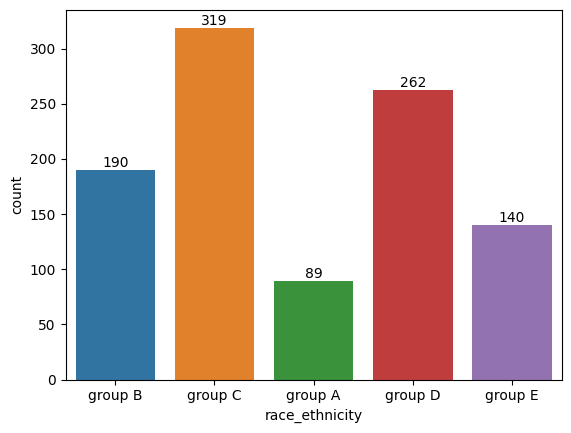

In [9]:
countplot = sns.countplot(data = df, x='race_ethnicity',hue='race_ethnicity' )
for container in countplot.containers:
      countplot.bar_label(container, label_type='edge')

Group A is a distinct value

In [10]:
df['_race_ethnicity'] = pd.Categorical(df.race_ethnicity).codes #converts its values into categorical codes

In [11]:
categories_with_codes = dict(enumerate(pd.Categorical(df['race_ethnicity']).categories)) #dictionary where the keys are the numerical codes and the values are the corresponding categories
print(categories_with_codes)

{0: 'group A', 1: 'group B', 2: 'group C', 3: 'group D', 4: 'group E'}


## Parental_level_of_education

In [12]:
print(df['parental_level_of_education'].value_counts())#count the occurrence of a value in a particular column
print()
parental_level_of_education_distribution =(df['parental_level_of_education'].value_counts()/len(df)*100) #count the occurrence of a value in a particular column
print(parental_level_of_education_distribution)

parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

parental_level_of_education
some college          22.6
associate's degree    22.2
high school           19.6
some high school      17.9
bachelor's degree     11.8
master's degree        5.9
Name: count, dtype: float64


Master's degree seems to be rare value, so patterns connected to this category should be watched closely

In [13]:
df['_parental_level_of_education'] = pd.Categorical(df['parental_level_of_education']).codes #converts its values into categorical codes

In [14]:
print(dict(enumerate(pd.Categorical(df['parental_level_of_education']).categories)))

{0: "associate's degree", 1: "bachelor's degree", 2: 'high school', 3: "master's degree", 4: 'some college', 5: 'some high school'}


## lunch

In [15]:
print(f"",df['lunch'].value_counts(), "",df['lunch'].value_counts()/len(df)*100)

 lunch
standard        645
free/reduced    355
Name: count, dtype: int64  lunch
standard        64.5
free/reduced    35.5
Name: count, dtype: float64


In [16]:
df['_lunch']= pd.Categorical(df['lunch']).codes #converts its values into categorical codes

In [17]:
print(dict(enumerate(pd.Categorical(df['lunch']).categories)))

{0: 'free/reduced', 1: 'standard'}


## test preparation

In [18]:
df['test_preparation_course'].value_counts()

test_preparation_course
none         642
completed    358
Name: count, dtype: int64

In [19]:
df['_test_preparation_course']= pd.Categorical(df['test_preparation_course']).codes #converts its values into categorical codes

In [20]:
print(dict(enumerate(pd.Categorical(df['test_preparation_course']).categories)))

{0: 'completed', 1: 'none'}


In [21]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,_gender,_race_ethnicity,_parental_level_of_education,_lunch,_test_preparation_course
0,female,group B,bachelor's degree,standard,none,72,72,74,0,1,1,1,1
1,female,group C,some college,standard,completed,69,90,88,0,2,4,1,0
2,female,group B,master's degree,standard,none,90,95,93,0,1,3,1,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,1,0,0,0,1
4,male,group C,some college,standard,none,76,78,75,1,2,4,1,1


# Correaltion heatmap

<Axes: >

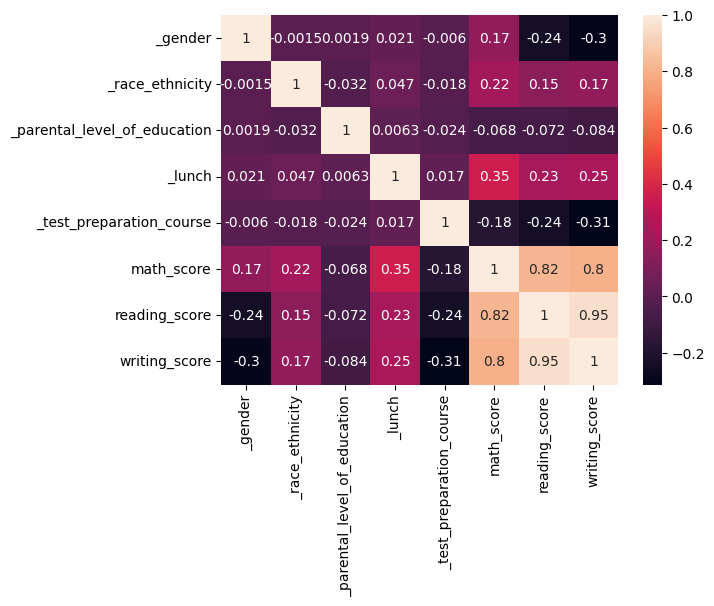

In [22]:
cols = ['_gender',	'_race_ethnicity',	'_parental_level_of_education',	'_lunch',	'_test_preparation_course', 'math_score',	'reading_score',	'writing_score' ]
corr = df[cols].corr()
sns.heatmap(corr, annot=True)

Lunch(0.29) and test_preparation(0.26) might have impact on reuslts in exams

# Standardization

To choose the best scaler to our data I have to look closely at properties in every column. Important thing is to check if there are **outliers values**
*(If some outliers are present in the set, robust scalers or other transformers can be more appropriate)*

Visialization of this columns might also be very important to decide what to choose

**However in this case there are no outliers values and data plot is similar to a normal distribution plot, so at this point standardization of those columns will be omitted**

# Data visualization

## Average score

In [23]:

df['average_score'] = df[['math_score', 'writing_score', 'reading_score']].mean(axis=1)
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,_gender,_race_ethnicity,_parental_level_of_education,_lunch,_test_preparation_course,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,0,1,1,1,1,72.666667
1,female,group C,some college,standard,completed,69,90,88,0,2,4,1,0,82.333333
2,female,group B,master's degree,standard,none,90,95,93,0,1,3,1,1,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,1,0,0,0,1,49.333333
4,male,group C,some college,standard,none,76,78,75,1,2,4,1,1,76.333333


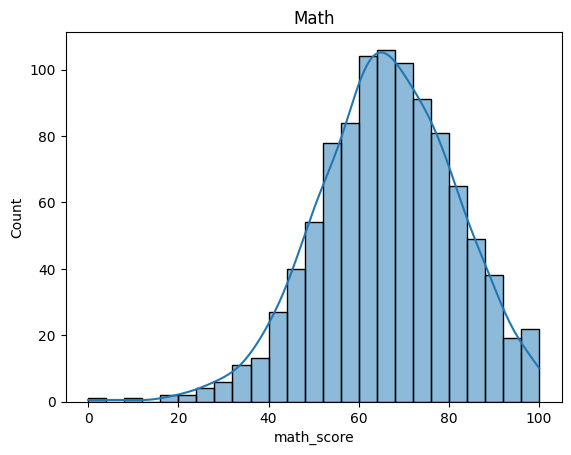

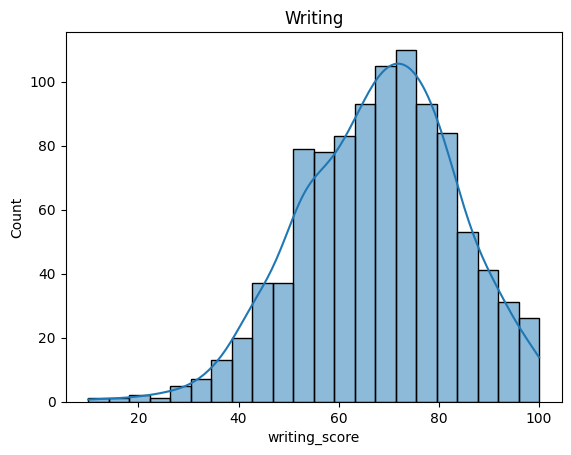

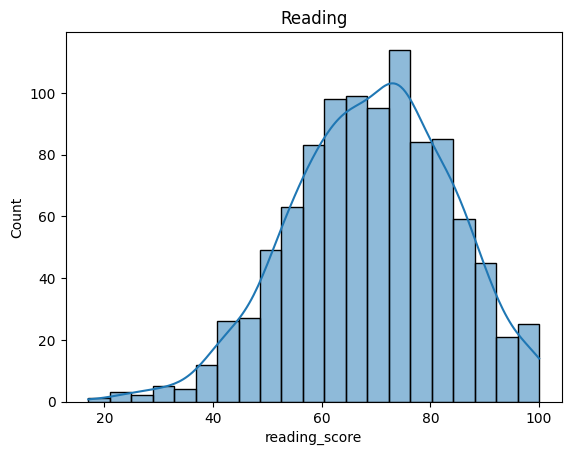

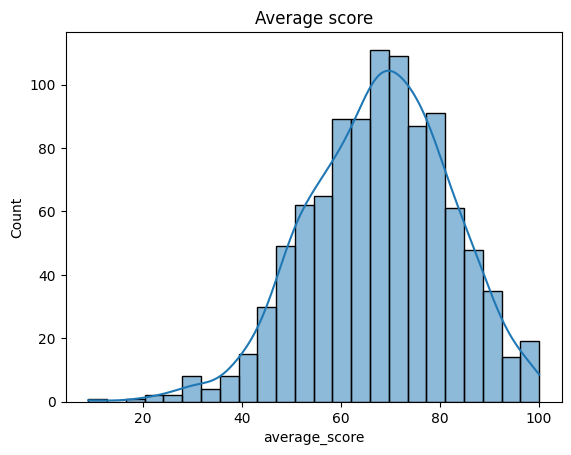

In [24]:
import matplotlib.pyplot as plt


sns.histplot(df['math_score'], kde=True) #kde- density plot
plt.title('Math')
plt.show()
sns.histplot(df['writing_score'], kde=True) #kde- density plot
plt.title('Writing')
plt.show()
sns.histplot(df['reading_score'], kde=True) #kde- density plot
plt.title('Reading')
plt.show()

sns.histplot(df['average_score'], kde=True) #kde- density plot
plt.title('Average score')
plt.show()

## Relation beetwen scores

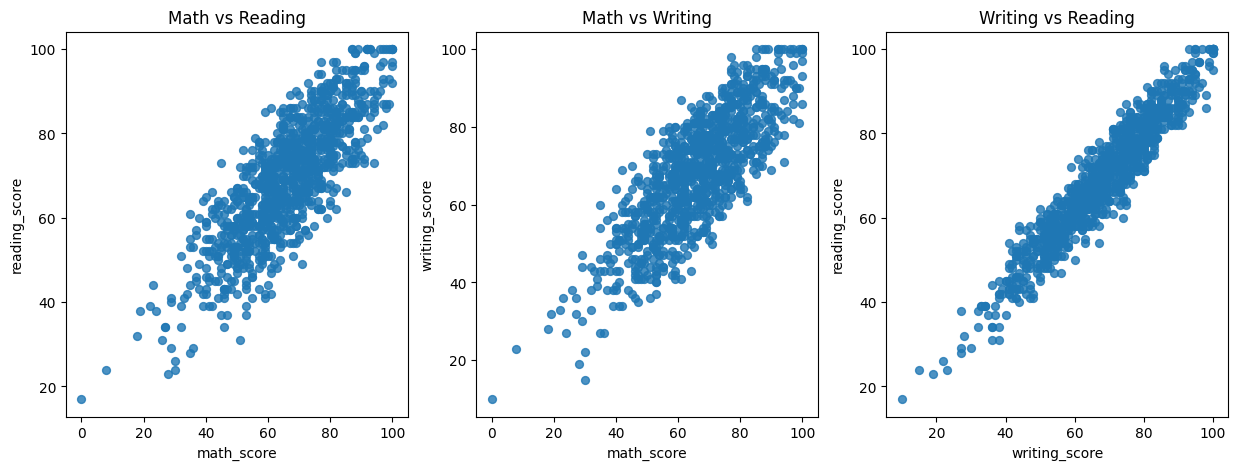

In [25]:
# Create a figure and subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Scatter plot 1: Math vs Reading
df.plot(kind='scatter', x='math_score', y='reading_score', s=32, alpha=.8, ax=axs[0]) #assigns this plot to the first subplot (index 0)
axs[0].set_title('Math vs Reading')

# Scatter plot 2: Math vs Writing
df.plot(kind='scatter', x='math_score', y='writing_score', s=32, alpha=.8, ax=axs[1])
axs[1].set_title('Math vs Writing')

# Scatter plot 3: Writing vs Reading
df.plot(kind='scatter', x='writing_score', y='reading_score', s=32, alpha=.8, ax=axs[2])
axs[2].set_title('Writing vs Reading')
plt.show()

<Axes: >

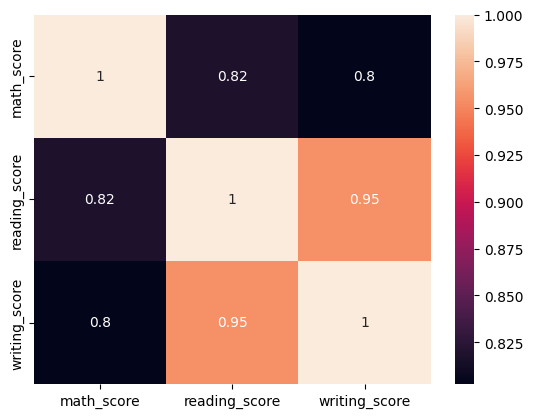

In [26]:
cols = [ 'math_score',	'reading_score',	'writing_score' ]
corr = df[cols].corr()
sns.heatmap(corr, annot=True)

There are high correlaction beetwen results in every subject. The most correlated is reading vs writing (0.95)

## Parental education vs average_score

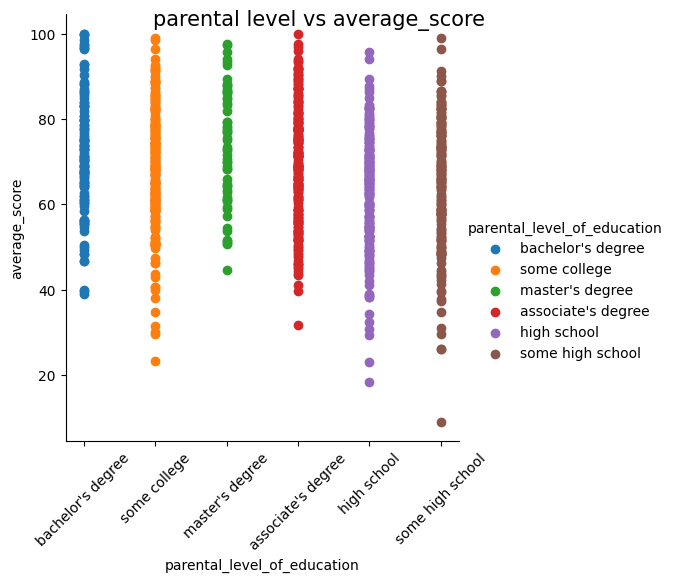

In [27]:
g = sns.FacetGrid(df, hue="parental_level_of_education", height=5, aspect=1)

# Map the scatter plot to the FacetGrid
g.map(plt.scatter, "parental_level_of_education", "average_score").add_legend()

# Set the title
g.fig.suptitle("parental level vs average_score", fontsize=15)
plt.xticks(rotation=45)
plt.show()

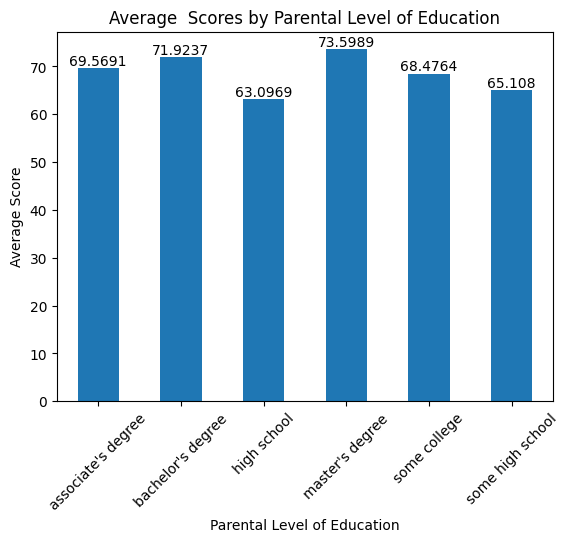

In [28]:
avgs_score = df.groupby('parental_level_of_education')['average_score'].mean()

bar_plot_avg= avgs_score.plot(kind='bar')
plt.title('Average  Scores by Parental Level of Education')
plt.xlabel('Parental Level of Education')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
for i in bar_plot_avg.containers:
    bar_plot_avg.bar_label(i, label_type='edge')


The best performance in exams have childrens whose parents have master's(73,6) or bachelor's(71,9) degree

## Parental education vs scores in every exam

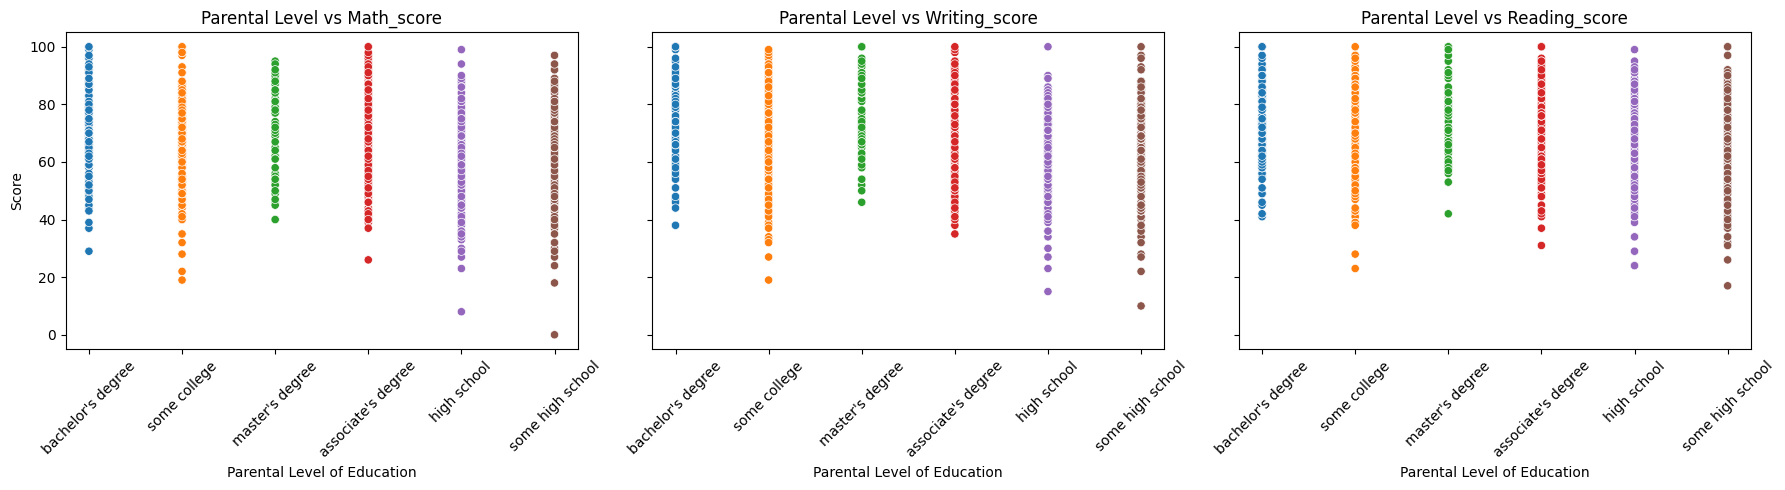

In [29]:
scores = ['math_score', 'writing_score', 'reading_score']

# Create a figure with subplots arranged in a row
fig, axes = plt.subplots(1, len(scores), figsize=(18, 5), sharey=True)

# Loop through each score and create the corresponding FacetGrid plot
for idx, score in enumerate(scores):
    ax = axes[idx]
    g = sns.scatterplot(data=df, x="parental_level_of_education", y=score, hue="parental_level_of_education", ax=ax, legend=False)
    ax.set_title(f'Parental Level vs {score.capitalize()}')
    ax.set_xlabel('Parental Level of Education')
    if idx == 0:
        ax.set_ylabel('Score')
    else:
        ax.set_ylabel('')
    ax.tick_params(axis='x', rotation=45)

# Adjust layout to make room for labels and titles
plt.tight_layout()
plt.show()

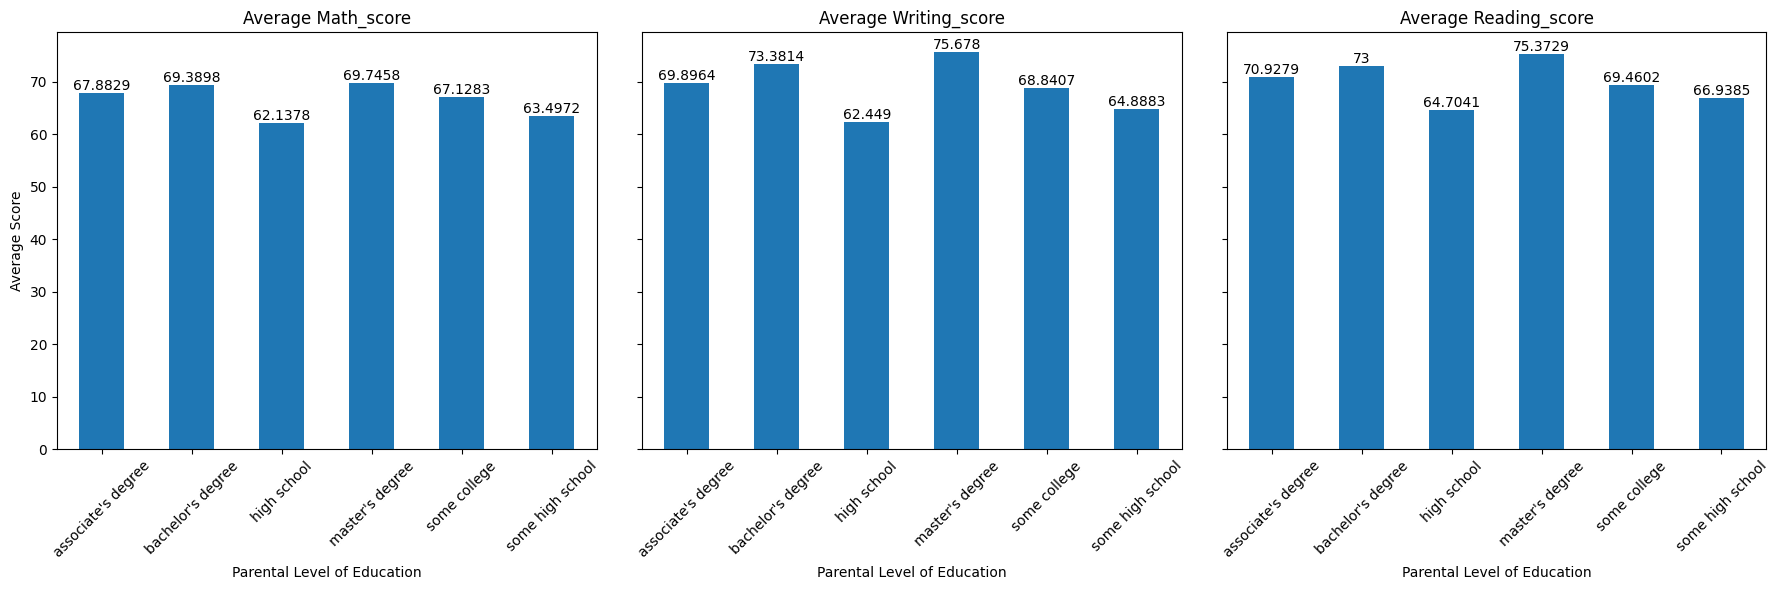

In [30]:
scores = ['math_score', 'writing_score', 'reading_score']

fig, axes = plt.subplots(1, len(scores), figsize=(18, 6), sharey=True)

# Loop through each score and create the corresponding subplot
for idx, score in enumerate(scores):
    avgs_score = df.groupby('parental_level_of_education')[score].mean()
    ax = axes[idx]

    # Plotting on the respective subplot
    bar_plot_avg = avgs_score.plot(kind='bar', ax=ax)

    # Setting the title and labels for each subplot
    ax.set_title(f'Average {score.capitalize()}')
    ax.set_xlabel('Parental Level of Education')
    ax.set_ylabel('Average Score' if idx == 0 else '')  # Only set y-label for the first subplot

    # Rotating x-ticks for better readability
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

    # Adding labels to the bars
    for container in bar_plot_avg.containers:
        bar_plot_avg.bar_label(container, label_type='edge')

# Adjust layout to make room for labels and titles
plt.tight_layout()
plt.show()

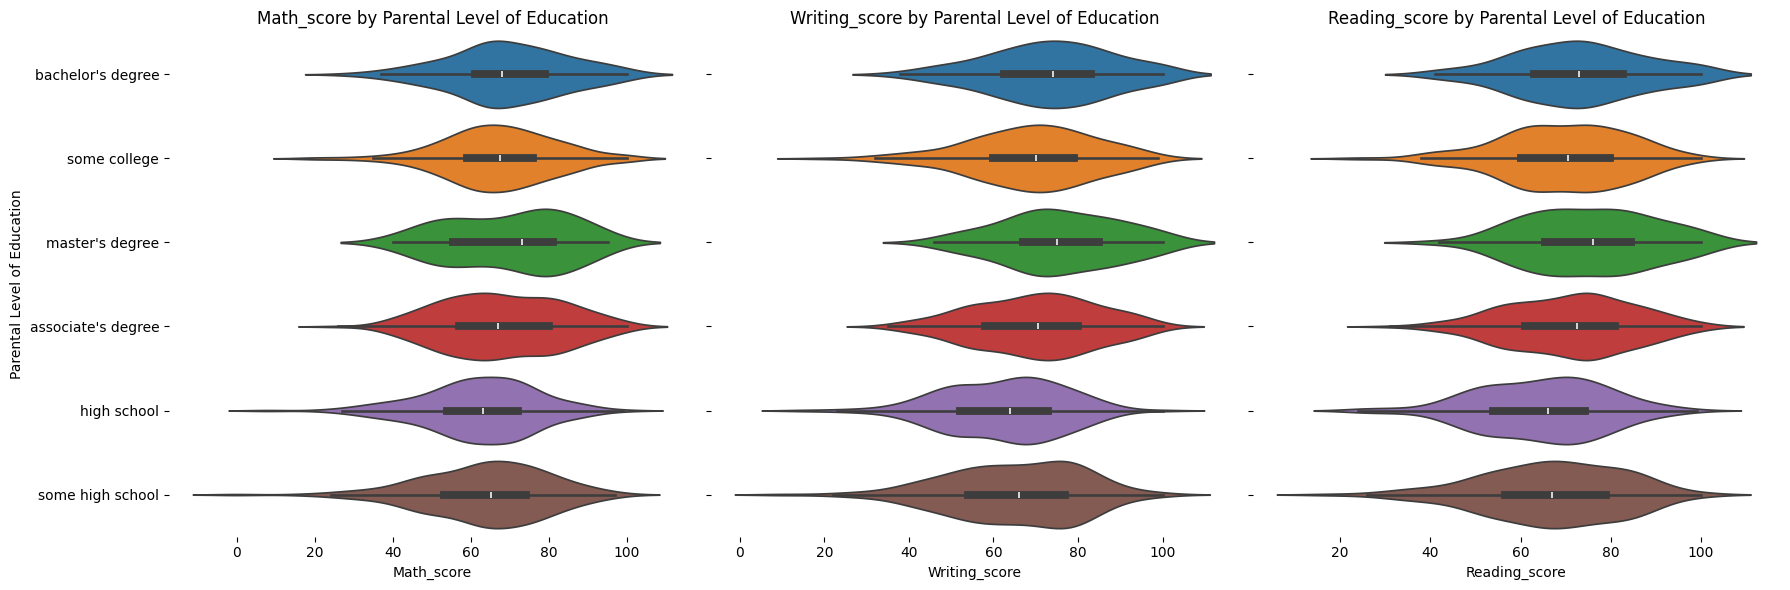

In [31]:
scores = ['math_score', 'writing_score', 'reading_score']

# Create a figure with subplots arranged in a row
fig, axes = plt.subplots(1, len(scores), figsize=(18, 6), sharey=True)

# Loop through each score and create the corresponding violin plot
for idx, score in enumerate(scores):
    ax = axes[idx]
    sns.violinplot(data=df, x=score, y='parental_level_of_education', hue='parental_level_of_education', ax=ax, inner='box')
    ax.set_title(f'{score.capitalize()} by Parental Level of Education')
    ax.set_xlabel(f'{score.capitalize()}')
    if idx == 0:
        ax.set_ylabel('Parental Level of Education')
    else:
        ax.set_ylabel('')
    sns.despine(ax=ax, top=True, right=True, bottom=True, left=True)

# Adjust layout to make room for labels and titles
plt.tight_layout()
plt.show()

The best performance in math exams have childrens whose parents have master's(69.38) or bachelor's(69,75) degree.
However this feature affects the most in writing and reading field

## Gender vs score

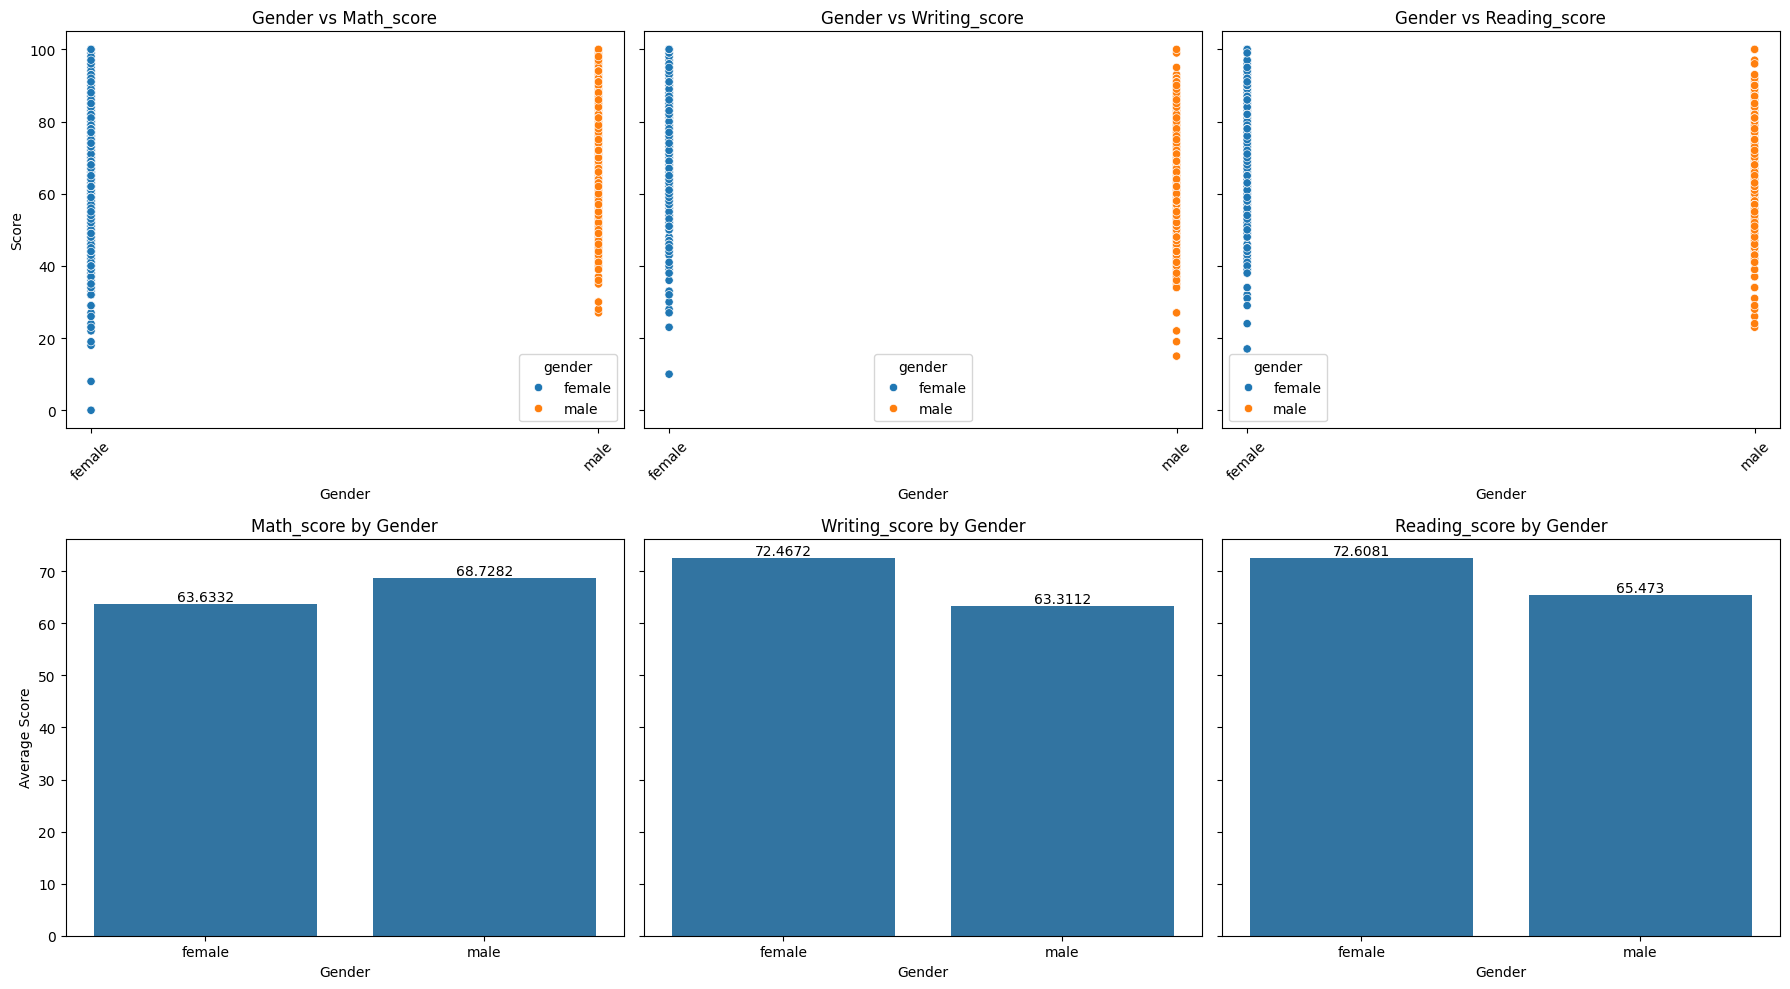

In [32]:
scores = ['math_score', 'writing_score', 'reading_score']

# Create a figure with subplots arranged in a row
fig, axes = plt.subplots(2, len(scores), figsize=(18, 10), sharey='row')

# Loop through each score and create the corresponding scatter plot and bar plot
for idx, score in enumerate(scores):
    # Scatter plot
    ax_scatter = axes[0, idx]
    sns.scatterplot(data=df, x="gender", y=score, hue="gender", ax=ax_scatter)
    ax_scatter.set_title(f'Gender vs {score.capitalize()}')
    ax_scatter.set_xlabel('Gender')
    if idx == 0:
        ax_scatter.set_ylabel('Score')
    else:
        ax_scatter.set_ylabel('')
    ax_scatter.tick_params(axis='x', rotation=45)

    # Bar plot
    ax_bar = axes[1, idx]
    avgs_score_gender = df.groupby('gender')[score].mean()
    bar_plot = sns.barplot(x=avgs_score_gender.index, y=avgs_score_gender.values, ax=ax_bar)
    ax_bar.set_title(f'{score.capitalize()} by Gender')
    ax_bar.set_xlabel('Gender')
    if idx == 0:
        ax_bar.set_ylabel('Average Score')
    else:
        ax_bar.set_ylabel('')
    # Add edge values to bar plots
    for container in ax_bar.containers:
        ax_bar.bar_label(container, label_type='edge')

# Adjust layout to make room for labels and titles
plt.tight_layout()
plt.show()

Gender have great impact on writing_score. Average female writing score is 9,15 percent higher than average male

As plots shows lunch type have impact on exam results. Average score of people with standard lunch type **is higher by 8,6 percent**

### Lunch vs math_score

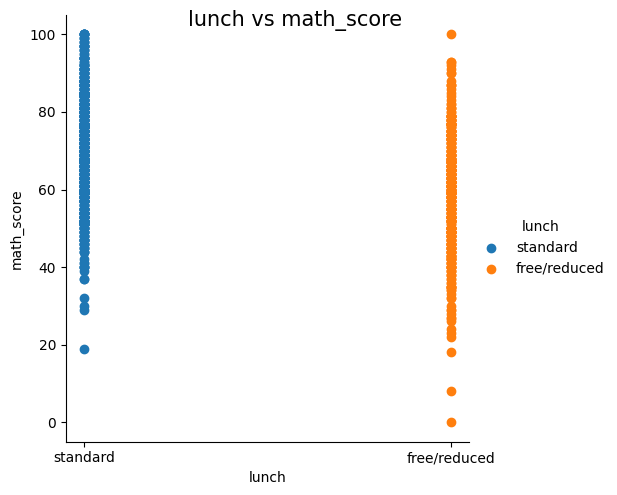

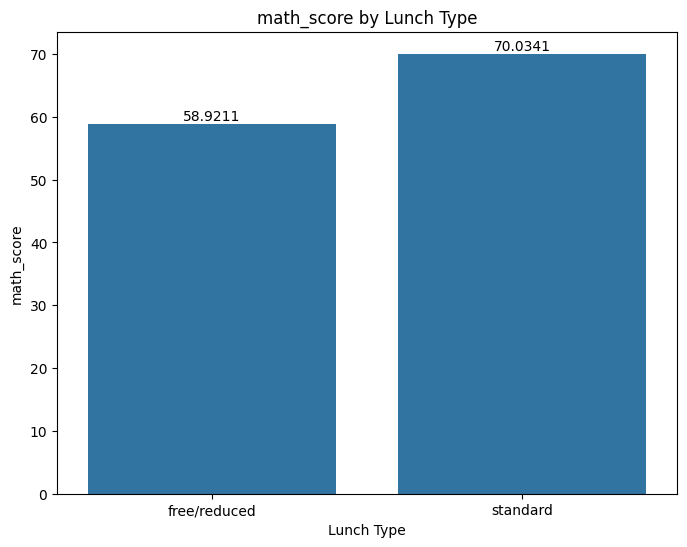

In [33]:
g = sns.FacetGrid(df, hue="lunch", height=5, aspect=1)

# Map the scatter plot to the FacetGrid
b =g.map(plt.scatter, "lunch", "math_score").add_legend()

g.fig.suptitle("lunch vs math_score", fontsize=15)
plt.show()


avgs_score_lunch = df.groupby('lunch')['math_score'].mean()
plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(x=avgs_score_lunch.index, y=avgs_score_lunch.values)
plt.title('math_score by Lunch Type')
plt.xlabel('Lunch Type')
plt.ylabel('math_score')
#add edge values
for container in bar_plot.containers:
    bar_plot.bar_label(container, label_type='edge')
plt.show()


The lunch type have great impact on performance in math exam. Average math score increases by **10,11** percent

## Lunch vs average score

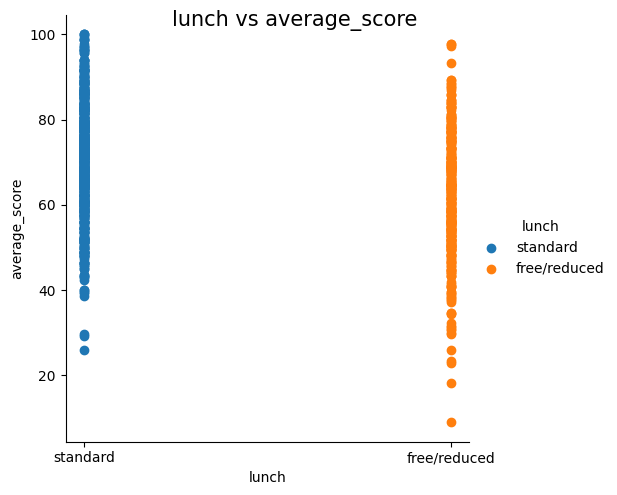

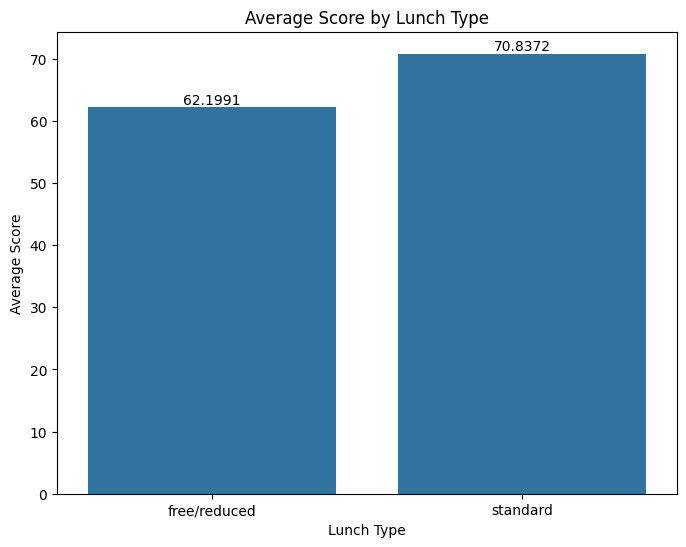

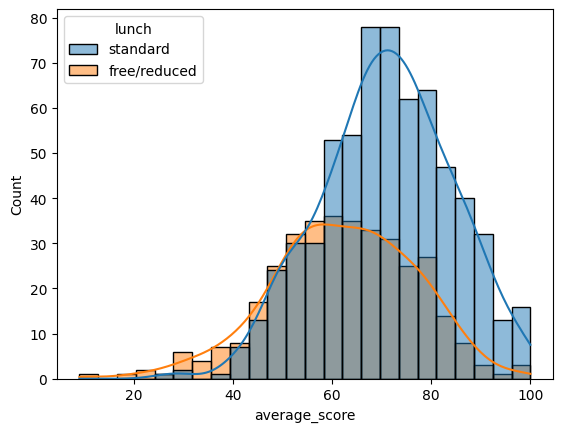

In [34]:
g = sns.FacetGrid(df, hue="lunch", height=5, aspect=1)

# Map the scatter plot to the FacetGrid
b =g.map(plt.scatter, "lunch", "average_score").add_legend()

g.fig.suptitle("lunch vs average_score", fontsize=15)
plt.show()


avgs_score_lunch = df.groupby('lunch')['average_score'].mean()
plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(x=avgs_score_lunch.index, y=avgs_score_lunch.values)
plt.title('Average Score by Lunch Type')
plt.xlabel('Lunch Type')
plt.ylabel('Average Score')
#add edge values
for container in bar_plot.containers:
    bar_plot.bar_label(container, label_type='edge')
plt.show()

sns.histplot(data=df,x='average_score',kde=True,hue='lunch')
plt.show()


## Test preparation vs exam scores

Firstly, I will visualize writing score due to high correlation score (0.35), and then describe its impact on average score in exams

## Writing score vs test preparation

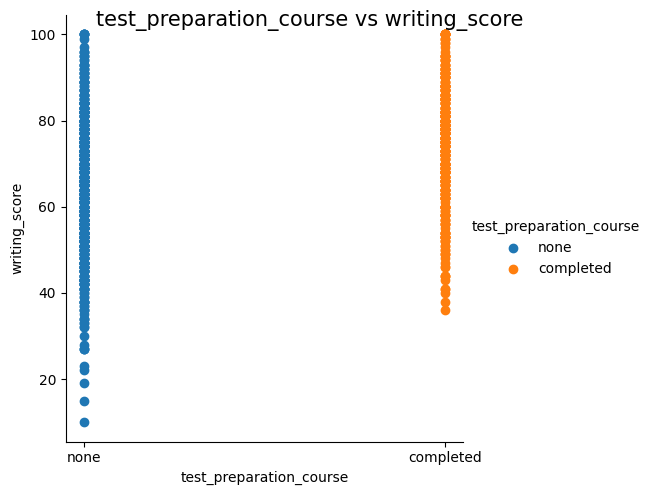

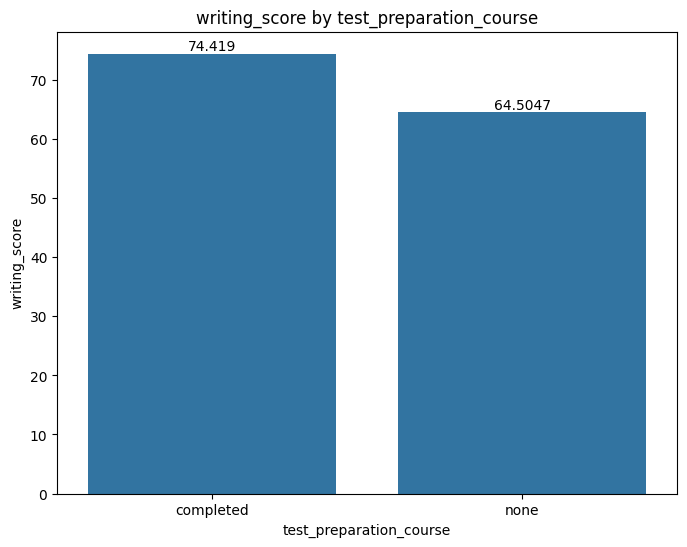

In [35]:
g = sns.FacetGrid(df, hue="test_preparation_course", height=5, aspect=1)

# Map the scatter plot to the FacetGrid
g.map(plt.scatter, "test_preparation_course", "writing_score").add_legend()

g.fig.suptitle("test_preparation_course vs writing_score", fontsize=15)
plt.show()


avgs_score_lunch = df.groupby('test_preparation_course')['writing_score'].mean()
plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(x=avgs_score_lunch.index, y=avgs_score_lunch.values)
plt.title('writing_score by test_preparation_course')
plt.xlabel('test_preparation_course')
plt.ylabel('writing_score')
#add edge values
for container in bar_plot.containers:
    bar_plot.bar_label(container, label_type='edge')
plt.show()


Test preparation course have great impact on writing_score. It increase average result by **9.9** percent

## Race vs math_score

### Violin plot
Violin plot is similar to box plot but shows density of data, so it combines the features of a box plot with a kernel density plot, which might be valuable to understand data well

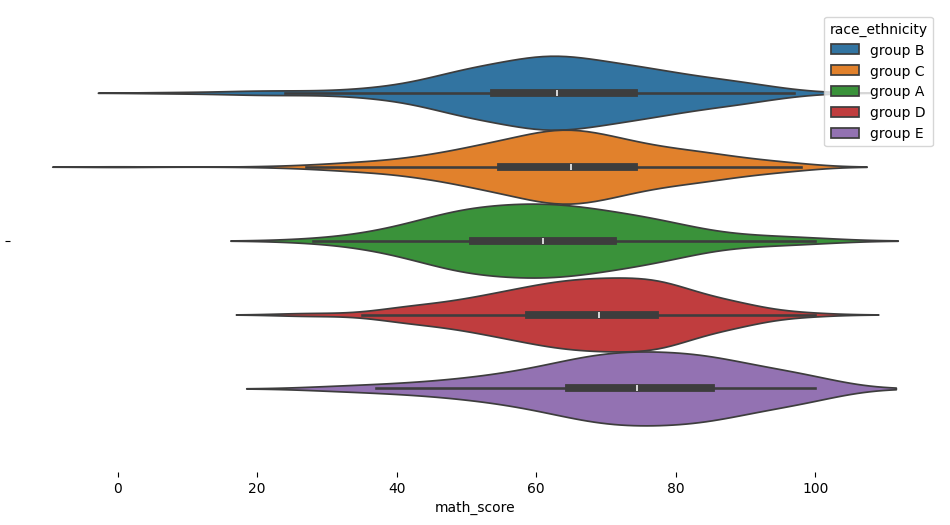

In [36]:
figsize = (12, 1.2 * len(df['race_ethnicity'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='math_score', hue='race_ethnicity', inner='box')
sns.despine(top=True, right=True, bottom=True, left=True)

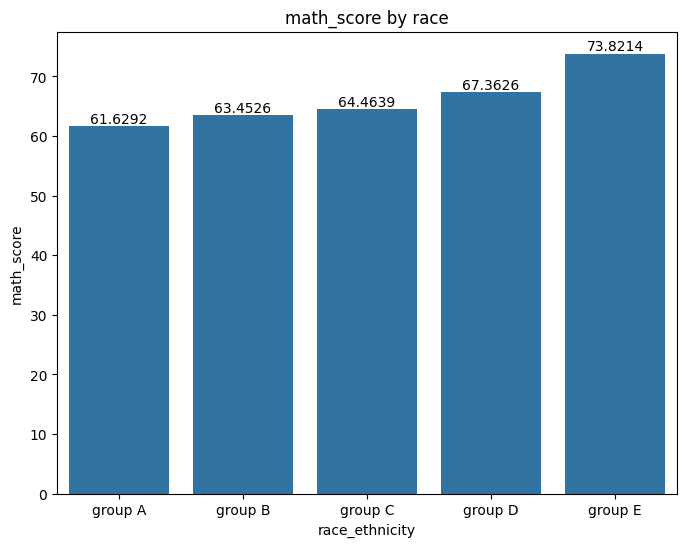

In [37]:
math_score_race = df.groupby('race_ethnicity')['math_score'].mean()
plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(x=math_score_race.index, y=math_score_race.values)
plt.title('math_score by race')
plt.xlabel('race_ethnicity')
plt.ylabel('math_score')
#add edge values
for container in bar_plot.containers:
    bar_plot.bar_label(container, label_type='edge')
plt.show()

## Visualization summary





Visualization showed that important properites might be:

for math_score:

**race** : difference between the race with highest and lowest average math score is **12,2**

**Lunch type** : Average math score increases by **11,11** percent. Student's with standard lunch performs better

**Parental education** : The best performance in math exams have childrens whose parents have master's(69.38) or bachelor's(69,75) degree



for writing_score:

**test preparation curse** : Test preparation course have great impact on writing_score. It increase average result by ** 12.9** percent

**lunch ** : Average score is incresed but not as much as in math score

**gender** : Gender have great impact on writing_score. Average female writing score is **9,15** percent higher than average male


for reading_score:
**test preparation curse** : Test preparation course have great impact on writing_score. It increase average result by ** 12.4** percent

**lunch ** : Average score is incresed but not as much as in math score

**gender** : Gender have great impact on writing_score. Average female writing score is **9,15** percent higher than average male


And also important are high correlaction beetwen results in every subject. The most correlated is reading vs writing (0.95)



# Choosing model
Choosing the right model for dataset is crucial point of work. Let's cosider every aspect of data to choose correctly,

1. Feature types - in this case there are both numerical and categoricial features, so decision tress might handle that
2. Feature interractions -  features don't interact with each other in complex ways
3. Feature importance - all feature seems to be equaly important
4. Data size - there are 1000 objects so is big enough to use more complex methods
5. Data distribution - the data visualization is similar to normal distribution
6. Outliers - This section is questionable and hard to decide. For example, (bachelor's degree - 11.8%, master's degree - 5.9%, in a feature where are 6 possible values). However, at this point, no outliers will be assumed
7. Noise - there are no noise
8. Temporary data - This data is not time-dependent



## Choosen models:

**Decision Trees**: Since decision trees handle both numerical and categorical data well and can provide insights into feature importance

**Gradient Boosting Machines (GBM)**: For potentially better performance at the cost of increased computational complexity

**Logistic Regression**: If the target variable is binary, logistic regression is a simple yet effective model, especially given the normal-like distribution of the data.

## Split the data
Goal: Use model to predict math_score

In [78]:
X = df.drop(['math_score','parental_level_of_education','race_ethnicity','lunch','gender','test_preparation_course'], axis=1) #use encoded eqivalent only
y = df['math_score']

In [43]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

num_features, cat_features

(Index(['reading_score', 'writing_score', '_gender', '_race_ethnicity',
        '_parental_level_of_education', '_lunch', '_test_preparation_course',
        'average_score'],
       dtype='object'),
 Index([], dtype='object'))

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np

metrics = [] #to store the data

# Linear Regression

In [79]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train) #calculate the optimal values of the weights 𝑏₀ and 𝑏₁

y_predict = lr.predict(X_test)

In [80]:


print("RMSE : ", np.sqrt(mean_squared_error(y_test, y_predict))) #(mean expexted difference  pomiedzy beetwen predicted and real value)
print("R2 : ", r2_score(y_test, y_predict)) #coefficient of determination, tells which amount of variation in 𝑦 can be explained by the dependence on 𝐱
print('Mean absolute error', mean_absolute_error(y_test, y_predict)) #typical absolute discrepancies between a dataset’s actual values and projected values
print('Mean squared error', mean_squared_error(y_test, y_predict))

RMSE :  4.2627382789965975e-14
R2 :  1.0
Mean absolute error 3.3733016380210754e-14
Mean squared error 1.8170937635222875e-27


# Decision Tree

In [81]:
from sklearn.tree import DecisionTreeRegressor
# Create a decision tree regressor
regressor = DecisionTreeRegressor(random_state=42)

# Train the decision tree on the training data
regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred_dts = regressor.predict(X_test)

print("RMSE : ", np.sqrt(mean_squared_error(y_test, y_pred_dts)))
print("R2 : ", r2_score(y_test, y_pred_dts))
print('Mean absolute error', mean_absolute_error(y_test, y_pred_dts)) #typical absolute discrepancies between a dataset’s actual values and projected values

RMSE :  4.288356328478313
R2 :  0.9244262311250505
Mean absolute error 3.3


## Optimalization of DTS

In [54]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Define the Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5) #setting up a grid search for hyperparameter tuning
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
best_rf_regressor = RandomForestRegressor(**best_params, random_state=1)
best_rf_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_rf_regressor.predict(X_test)

# Evaluate the model
r_squared = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")
print(f"R-squared: {r_squared}")
print('Mean absolute error', mean_absolute_error(y_test, y_predict)) #typical absolute discrepancies between a dataset’s actual values and projected values


RMSE: 3.060559897941697
R-squared: 0.9618349645485694
Mean absolute error 18.23499999999998


# GradienBoosting

In [85]:
from sklearn.ensemble import GradientBoostingRegressor

# Setting SEED for reproducibility
SEED = 23
# Instantiate Gradient Boosting Regressor
gbr = GradientBoostingRegressor(loss='absolute_error',
                                learning_rate=0.1,
                                n_estimators=300,
                                max_depth = 1,
                                random_state = SEED,
                                max_features = 5)

# Fit to training set
gbr.fit(X_train, y_train)

# Predict on test set
y_predict_Gradient = gbr.predict(X_test)
rmse_gbr = np.sqrt(mean_squared_error(y_test, y_predict_Gradient))
r2_gbr = r2_score(y_test, y_predict_Gradient)
mae_gbr = mean_absolute_error(y_test, y_predict_Gradient)

print("RMSE : ", np.sqrt(mean_squared_error(y_test, y_predict_Gradient))) #(mean expexted difference  pomiedzy beetwen predicted and real value)
print("R2 : ", r2_score(y_test, y_predict_Gradient)) #coefficient of determination, tells which amount of variation in 𝑦 can be explained by the dependence on 𝐱
print('Mean absolute error', mean_absolute_error(y_test, y_predict_Gradient)) #typical absolute discrepancies between a dataset’s actual values and projected values


# Append the metrics to the list
metrics.append({
    'Model': 'Gradient Boosting',
    'RMSE': rmse_gbr,
    'R2': r2_gbr,
    'MAE': mae_gbr
})

RMSE :  4.505163979589058
R2 :  0.9165914525492618
Mean absolute error 3.424073880398226


In [86]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree = 2) #Generate a new feature matrix consisting of all polynomial combinations
X_train_poly = poly_features.fit_transform(X_train) #transforms  into polynomial features with the 2nd degree

pr = LinearRegression()  #create a linear regression model trained on the polynomial features
pr.fit(X_train_poly, y_train)

X_test_poly = poly_features.fit_transform(X_test)
y_predict_poly = pr.predict(X_test_poly)

rmse_poly = np.sqrt(mean_squared_error(y_test, y_predict_poly))
r2_poly = r2_score(y_test, y_predict_poly)
mae_poly = mean_absolute_error(y_test, y_predict_poly)

print("RMSE : ", np.sqrt(mean_squared_error(y_test, y_predict_poly))) #(mean expexted difference  pomiedzy beetwen predicted and real value)
print("R2 : ", r2_score(y_test, y_predict_poly)) #coefficient of determination, tells which amount of variation in 𝑦 can be explained by the dependence on 𝐱
print('Mean absolute error', mean_absolute_error(y_test, y_predict_poly)) #typical absolute discrepancies between a dataset’s actual values and projected values


# Append the metrics to the list
metrics.append({
    'Model': 'Polynomial',
    'RMSE': rmse_poly,
    'R2': r2_poly,
    'MAE': mae_poly
})

RMSE :  1.6035188355850441e-12
R2 :  1.0
Mean absolute error 1.2739161114883047e-12


# Summary

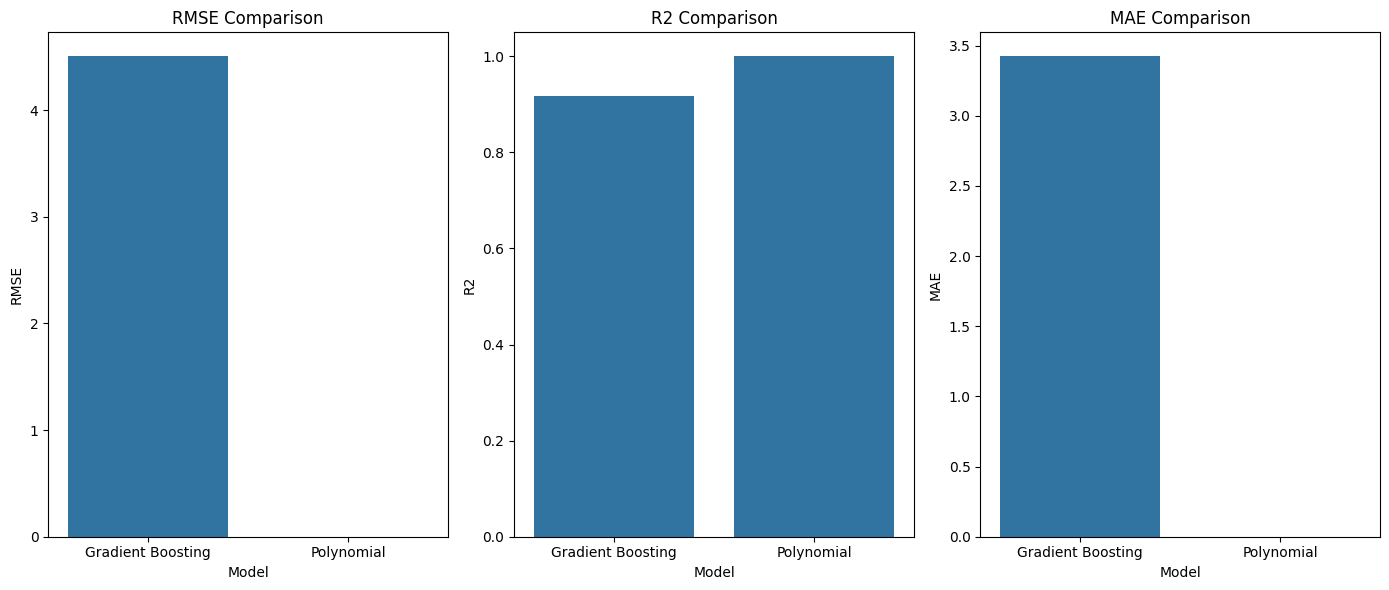

In [87]:
# Convert the list of metrics to a DataFrame
metrics_df = pd.DataFrame(metrics)

# Set the figure size
plt.figure(figsize=(14, 6))

# Plot RMSE
plt.subplot(1, 3, 1)
sns.barplot(x='Model', y='RMSE', data=metrics_df)
plt.title('RMSE Comparison')
plt.xlabel('Model')
plt.ylabel('RMSE')

# Plot R2
plt.subplot(1, 3, 2)
sns.barplot(x='Model', y='R2', data=metrics_df)
plt.title('R2 Comparison')
plt.xlabel('Model')
plt.ylabel('R2')

# Plot MAE
plt.subplot(1, 3, 3)
sns.barplot(x='Model', y='MAE', data=metrics_df)
plt.title('MAE Comparison')
plt.xlabel('Model')
plt.ylabel('MAE')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()